## 1. Debemos describir brevemente la información que nos entrega la base de datos. Para ello, puede ser útil cargar la base mediante el siguiente código:

* from sklearn import datasets 
* iris = datasets.load_iris()

In [1]:
import numpy as np
import pandas as pd
import plotnine as ptn
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Se carga el dataset de la flor de iris.

from sklearn import datasets
iris = datasets.load_iris()

irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# Información del dataset

print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# El dataset es limpio y no presenta datos nulos.

irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


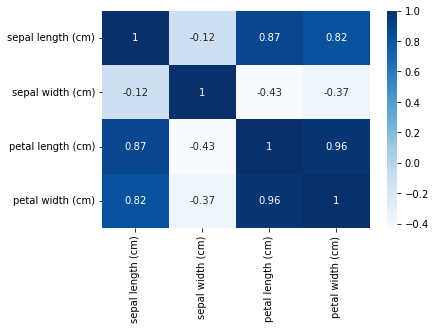

In [6]:
# Existe una correlación alta entre el largo y el ancho del pétalo, por lo que trabajaremos con el sépalo.

sns.heatmap(irisDF.corr(), annot=True, cmap = 'Blues')
plt.show()

In [7]:
irisDF.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## 2. Ahora, debemos graficar las relaciones con las cuales buscaremos realizar el agrupamiento de clusters (por ejemplo, largo del sépalo versus ancho del sépalo).

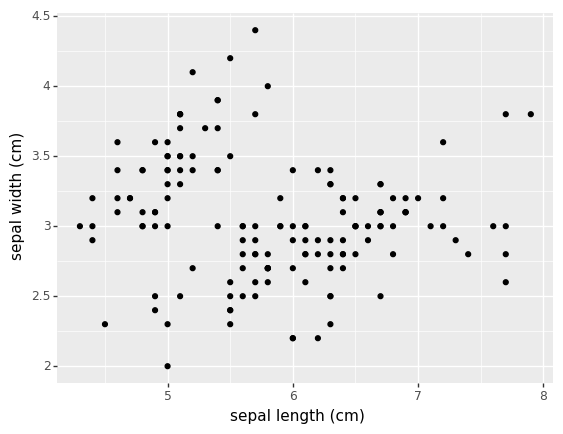

<ggplot: (138273714387)>

In [8]:
ggplot(irisDF, aes(x="sepal length (cm)", y="sepal width (cm)")) + geom_point()

## 3. Lo siguiente es entrenar el modelo y determinar los centros de cada cluster, su inercia y etiqueta.

In [9]:
# Se seleccionar 3 clusters. Cantidad obtenida por el método del codo y el coeficiente de silueta más adelante.

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

In [10]:
# Se entrena el modelo

km = km.fit(irisDF)

In [11]:
km

KMeans(n_clusters=3)

In [12]:
# Se determinan los centroides de los clusters.

pd.DataFrame(km.cluster_centers_, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,6.853846,3.076923,5.715385,2.053846
2,5.883607,2.740984,4.388525,1.434426


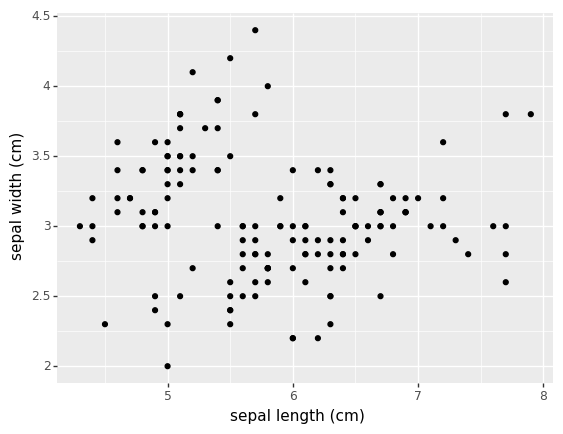

<ggplot: (138273885046)>

In [13]:
ggplot(irisDF, aes(x="sepal length (cm)", y="sepal width (cm)")) + geom_point()

In [14]:
# Se determina la inercia.

km.inertia_

78.8556658259773

In [15]:
# Se determina el score. Puntaje similar a la inercia, pero en negativo.

km.score(irisDF)

-78.8556658259773

In [16]:
# Se determinan las etiquetas.

km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [17]:
# Se almacena variable para las etiquetas.

labels = pd.Series(km.labels_, index=irisDF.index, dtype='category')

In [18]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    2
147    1
148    1
149    2
Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]

In [19]:
# Se determina variable para los centroides.

centroides = pd.DataFrame(km.cluster_centers_, columns=irisDF.columns).reset_index()

In [20]:
centroides

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.006000,3.428000,1.462000,0.246000
1,1,6.853846,3.076923,5.715385,2.053846
2,2,5.883607,2.740984,4.388525,1.434426


## 4. Debemos, además, graficar los clusters.

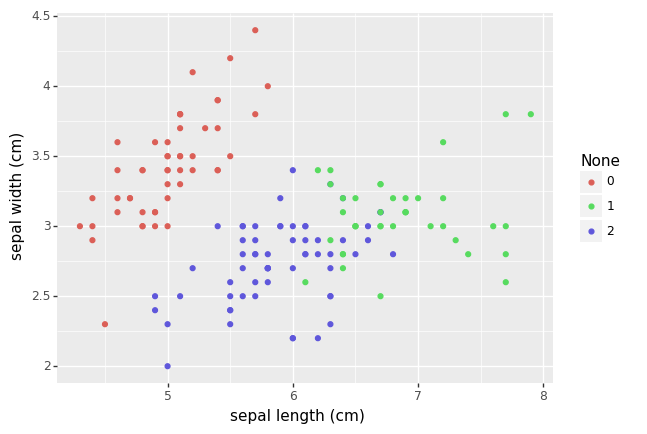

<ggplot: (138274208552)>

In [21]:
# Se gráfican los clusters por colores.

ggplot(irisDF, aes(x="sepal length (cm)", y="sepal width (cm)", color=labels)) + geom_point() 

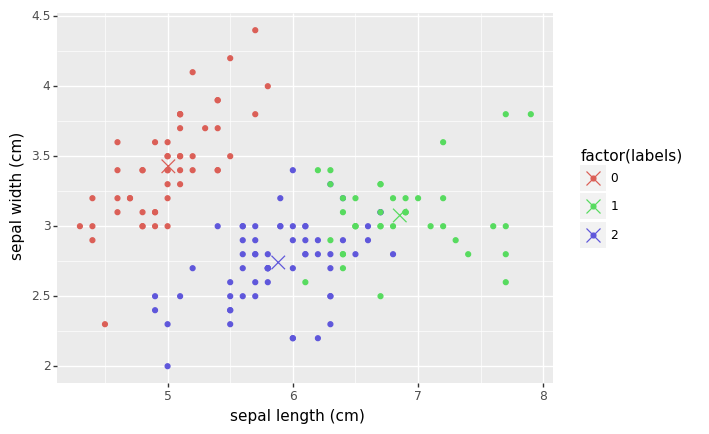

In [22]:
# Se crea un dataframe con los centros y etiquetas.

irisDF2=pd.DataFrame(km.cluster_centers_,columns=iris.feature_names)
irisDF2['labels']=range(km.n_clusters)

# Se crea el gráfico marcando los puntos donde se encuentran los centroides.

print(ggplot(irisDF)+aes(x="sepal length (cm)", y="sepal width (cm)",color="factor(labels)")+geom_point()
     +geom_point(data=irisDF2,shape="x",size=5))

## 5. Por último, mediante el método del codo, determinemos cuál es el número de clusters ideales para realizar la agrupación.

In [23]:
# Se corre el algoritmo varias veces para ir gráficando la inercia que se va generando con clusters del 1 al 5

x = [] 
numK = 6
for k in range(1, numK):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(irisDF)
    x.append(kmeans.inertia_)

C:\Users\alvar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


<AxesSubplot:>

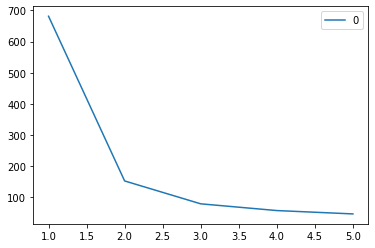

In [24]:
# Mediante el método del codo cunado la bajada deja de ser tan precipitada es la cantidad ideal (3 o 4)

pd.DataFrame(x, index=np.arange(1,numK)).plot()

In [25]:
# Coeficiente de silueta como alternativa para determinar la cantidad ideal de clusters

from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(irisDF, kmeans.labels_)

0.48874888709310566

In [26]:
# Se ejecuta el algoritmo varias veces con diferentes clusters y se obtienen sus coeficientes de silueta

x2 = np.linspace(2,8,7)
y2 = []
for i in range(2,9):
    k = i
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit_predict(irisDF)
    a = silhouette_score(irisDF, kmeans2.labels_)
    y2.append(a)

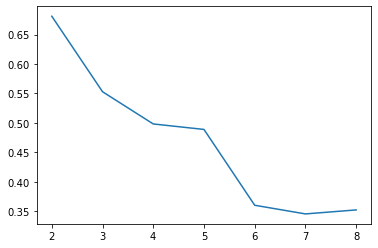

In [27]:
# Se grafican. Cerca de donde está el más alto (3) es la cantidad ideal, de acuerdo a esta técnica

plt.plot(x2,y2)

Para n_clusters = 2 La media de silhouette_score es : 0.6810461692117462
Para n_clusters = 3 La media de silhouette_score es : 0.5528190123564095
Para n_clusters = 4 La media de silhouette_score es : 0.49805050499728737
Para n_clusters = 5 La media de silhouette_score es : 0.48874888709310566


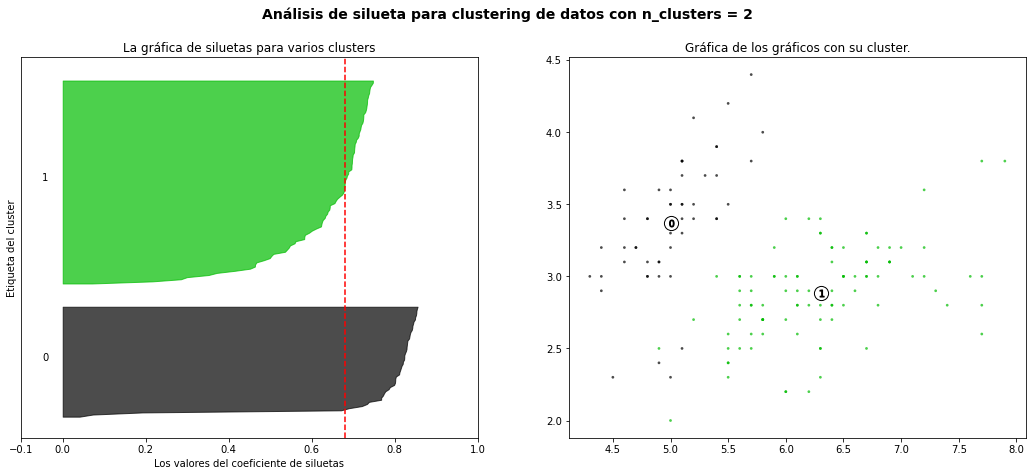

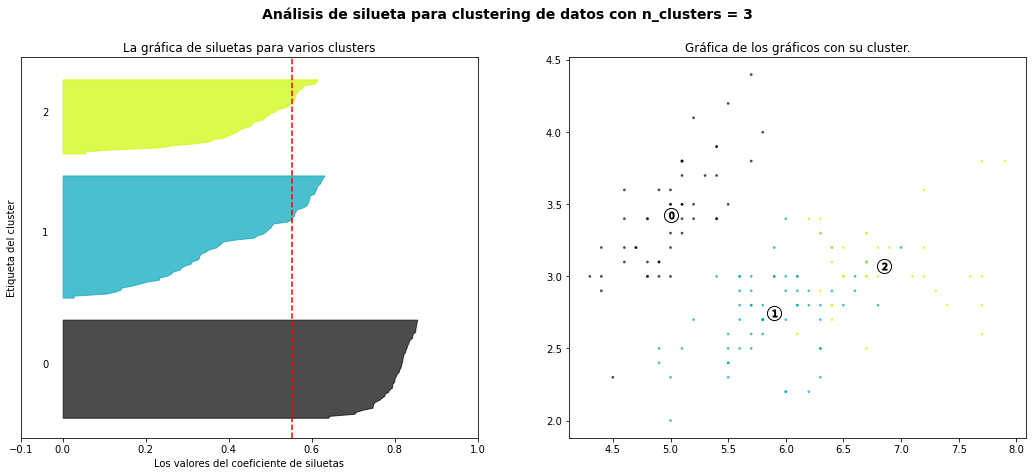

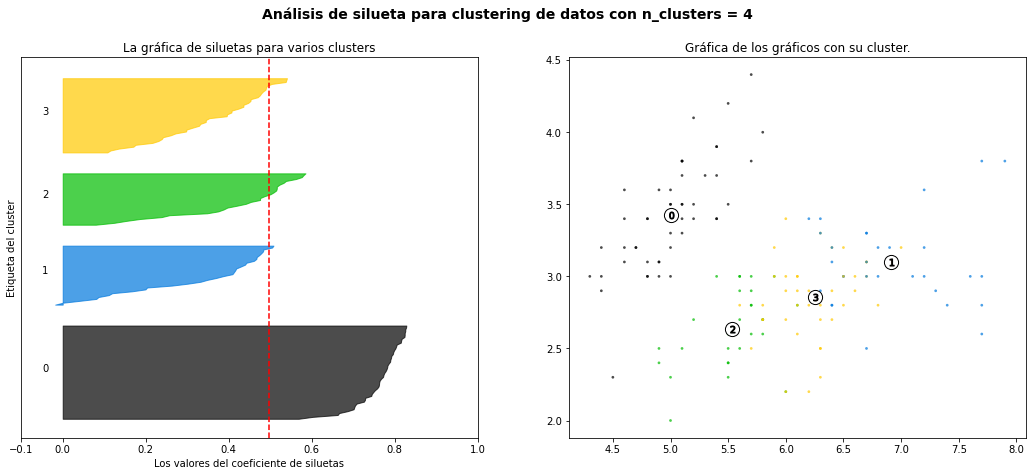

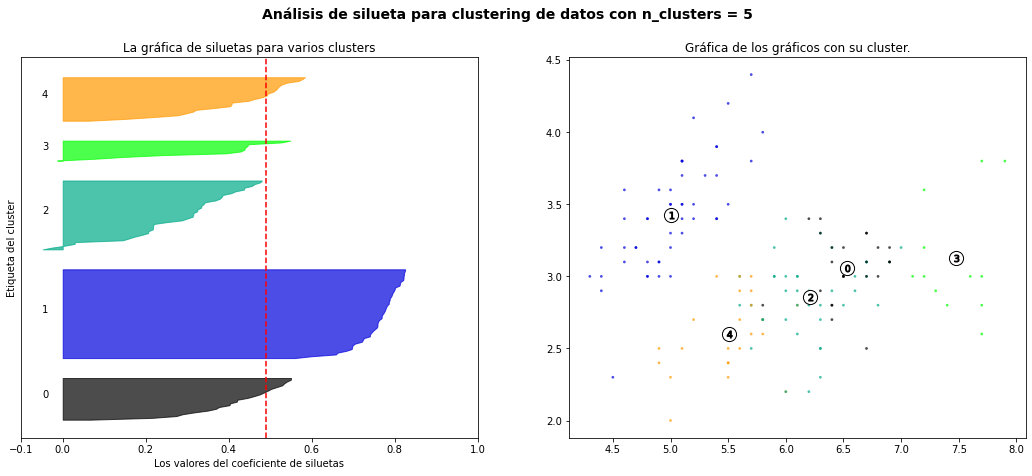

In [28]:
# Se realiza el diagrama de silueta, que indica el puntaje de silueta para ciertas cantidades de clusters

import matplotlib.cm as cm
X = irisDF
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)


    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "La media de silhouette_score es :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("La gráfica de siluetas para varios clusters")
    ax1.set_xlabel("Los valores del coeficiente de siluetas")
    ax1.set_ylabel("Etiqueta del cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Gráfica de los gráficos con su cluster.")

    plt.suptitle(
        "Análisis de silueta para clustering de datos con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()